In [1]:
from navani import echem as ec
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = ec.echem_file_loader('Example_data/bs542_004_gr_li_50ua_50mv_1v_191020_Channel_11.xlsx')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Capacity / mAh', ylabel='Voltage / V'>)

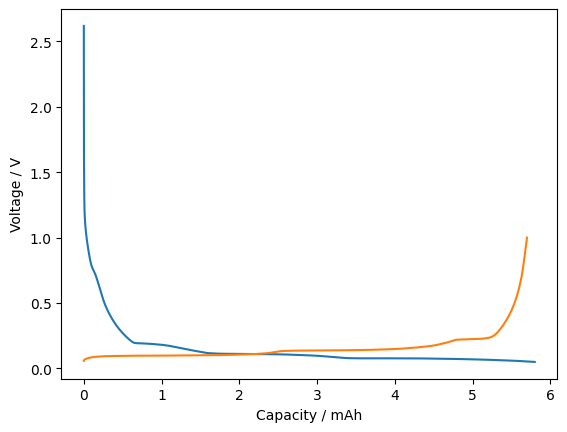

In [3]:
ec.charge_discharge_plot(df, 1)

Text(0, 0.5, 'dQ/dV / mAhV$^{-1}$')

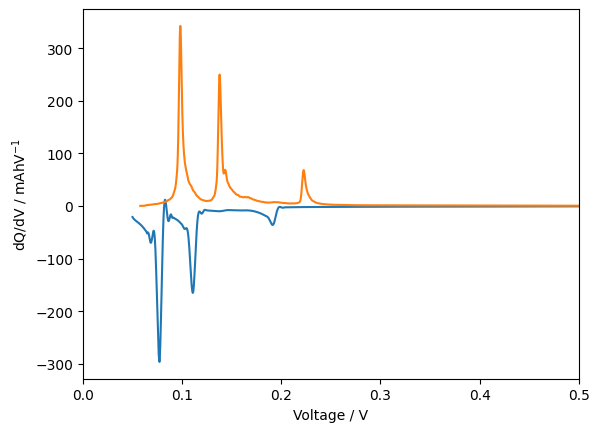

In [4]:
for cycle in [1, 2]:
    mask = df['half cycle'] == cycle
    voltage, dqdv, capacity = ec.dqdv_single_cycle(df['Capacity'][mask], df['Voltage'][mask],
                                                   window_size_1=51,
                                                    polyorder_1=5,
                                                    s_spline=0.0,
                                                    window_size_2=51,
                                                    polyorder_2=5,
                                                    final_smooth=True)
    plt.plot(voltage, dqdv)

plt.xlim(0, 0.5)
plt.xlabel('Voltage / V')
plt.ylabel('dQ/dV / mAhV$^{-1}$')

In [7]:
df = ec.echem_file_loader("Example_data/arbin_example.res")

Reading version number...
Reading Version_Table...
Reading Global_Table...
Reading Resume_Table...
Reading Channel_Normal_Table...
Creating indices for Channel_Normal_Table...
Reading Channel_Statistic_Table...
Reading Auxiliary_Table...
Reading Event_Table...
Reading Smart_Battery_Info_Table...
Reading Smart_Battery_Data_Table...
Reading MCell_Aci_Data_Table...
Reading Aux_Global_Data_Table...
Reading Smart_Battery_Clock_Stretch_Table...
Creating helper table for capacity and energy totals...
Vacuuming database...


In [8]:
df.head()

,Test_ID,Test_Time,Step_Time,DateTime,Step_Index,Cycle_Index,Is_FC_Data,Current,Voltage,Charge_Capacity,...,Discharge_Energy,dV/dt,Internal_Resistance,AC_Impedance,ACI_Phase_Angle,state,cycle change,half cycle,Capacity,full cycle
Data_Point,,,,,,,,,,,,,,,,,,,,,
1,1,0.072595,0.072596,45131.784722,1,1,0,0.0,3.859196,0.0,...,0.0,0.000000,0.0,0.0,0.0,R,False,0,0.0,0.0
2,1,300.080161,300.080161,45131.788194,1,1,0,0.0,3.858888,0.0,...,0.0,0.000000,0.0,0.0,0.0,R,False,0,0.0,0.0
3,1,600.080291,600.080291,45131.791667,1,1,0,0.0,3.858581,0.0,...,0.0,0.000000,0.0,0.0,0.0,R,False,0,0.0,0.0
4,1,900.080440,900.080440,45131.795139,1,1,0,0.0,3.859196,0.0,...,0.0,0.000000,0.0,0.0,0.0,R,False,0,0.0,0.0
5,1,1200.080504,1200.080504,45131.798611,1,1,0,0.0,3.858888,0.0,...,0.0,0.000062,0.0,0.0,0.0,R,False,0,0.0,0.0
